In [1]:
import pyscf
import pyscf.tools

from orbitalpartitioning import *

In [2]:
molecule = """
Fe  5.48 1.15 -8.03
S   4.05 -0.61 -8.75
S   7.49 0.42 -9.04
Fe  6.04 -1.22 -9.63
S   5.47 1.25 -5.58
S   4.63 3.28 -8.77
S   5.75 -1.50 -12.05
S   6.86 -3.41 -8.86
C   5.51 4.45 -7.51
H   6.49 4.83 -7.92
H   4.87 5.33 -7.25
H   5.72 3.84 -6.59
C   3.60 1.70 -5.54
H   3.01 0.80 -5.82
H   3.28 2.06 -4.52
H   3.42 2.48 -6.31
C   5.21 -4.22 -9.46
H   5.10 -4.01 -10.55
H   5.21 -5.32 -9.26
H   4.37 -3.72 -8.93
C   7.63 -1.85 -12.24
H   7.90 -2.06 -13.31
H   8.20 -0.96 -11.86
H   7.89 -2.72 -11.59
"""

basis = "def2-svp"
pymol = pyscf.gto.Mole(
        atom    =   molecule,
        symmetry=   True,
        spin    =   10, # number of unpaired electrons
        charge  =   -2,
        basis   =   basis)


pymol.build()
print("symmetry: ",pymol.topgroup)
# mf = pyscf.scf.UHF(pymol).x2c()
# mf = pyscf.scf.ROHF(pymol).newton()
# mf = pyscf.scf.UHF(pymol)

mf = pyscf.dft.UKS(pymol)
# mf.xc = 'b3lyp'
# mf.damp = 0.5
# mf.diis_start_cycle = 8

mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.chkfile = "scf.fchk"
# mf.init_guess = "sad"
mf.run(max_cycle=100)
mf.analyze()


symmetry:  C1


******** <class 'pyscf.dft.uks.UKS'> ********
method = UKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 100
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = scf.fchk
max_memory 4000 MB (current use 0 MB)
number electrons alpha = 98  beta = 88
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = LDA,VWN
    P. A. M. Dirac.,  Math. Proc. Cambridge Philos. Soc. 26, 376 (1930)
    F. Bloch.,  Z. Phys. 57, 545 (1929)
    S. H. Vosko, L. Wilk, and M. Nusair.,  Can. J. Phys. 58, 1200 (1980)
small_rho_cutoff = 1e-07
init E= -5058.19905145511
  alpha nocc = 98  HOMO = 0.0510097428994648  LUMO = 0.0551331717419656
  beta  nocc = 88  HOMO = -0.258855352669713  LUMO = -0.0657845295765876

WARN: system HOMO 0

(((array([9.99999171e-01, 9.99980571e-01, 9.99955736e-01, 3.31741703e-01,
          1.37730219e-02, 9.99992249e-01, 9.99991610e-01, 9.99992110e-01,
          9.99988676e-01, 9.99988636e-01, 9.99989028e-01, 2.43199980e-02,
          2.28957320e-02, 2.21305569e-02, 9.93184134e-01, 9.95486298e-01,
          9.93308042e-01, 9.92244656e-01, 9.93720241e-01, 1.06636818e-03,
          1.17103093e-03, 1.16689878e-03, 7.95334701e-04, 1.30659669e-03,
          5.81519151e-06, 4.84956283e-06, 5.14688304e-06, 5.51299505e-06,
          3.55273517e-06, 6.72876229e-06, 6.30518098e-06, 9.99996538e-01,
          9.99822800e-01, 9.49333556e-01, 1.55619883e-03, 9.99908333e-01,
          9.99911065e-01, 9.99919642e-01, 9.30562793e-01, 9.27800742e-01,
          9.64226494e-01, 2.20067102e-03, 2.13848280e-03, 1.60524078e-03,
          2.13611260e-03, 8.83445129e-04, 1.14978428e-03, 1.66814581e-03,
          2.10113291e-03, 9.99996533e-01, 9.99822404e-01, 9.47275841e-01,
          1.31927769e-03, 9.99907853e-

In [3]:
Ca = mf.mo_coeff[0][:,mf.mo_occ[0]==1]
Cb = mf.mo_coeff[1][:,mf.mo_occ[1]==1]
Va = mf.mo_coeff[0][:,mf.mo_occ[0]==0]
Vb = mf.mo_coeff[1][:,mf.mo_occ[1]==0]
S = mf.get_ovlp()
Pa = Ca @ Ca.T
Pb = Cb @ Cb.T
Pspin = Pa - Pb
pyscf.tools.molden.from_mo(mf.mol, "scr/Ca.molden", Ca)
pyscf.tools.molden.from_mo(mf.mol, "scr/Cb.molden", Cb)
pyscf.tools.cubegen.density(mf.mol, "scr/Pspin.cube", Pspin, resolution=None, margin=3.0);

    0   1.00000000   0.00000000
    1   1.00000000   0.00000000
    2   1.00000000   0.00000000
    3   1.00000000   0.00000000
    4   1.00000000   0.00000000
    5   1.00000000   0.00000000
    6   1.00000000   0.00000000
    7   1.00000000   0.00000000
    8   1.00000000   0.00000000
    9   1.00000000   0.94707001
   10   0.05292999   0.00863420
   11   0.04429580   0.00323070
   12   0.04106510   0.00376343
   13   0.03730166   0.00424349
   14   0.03305817   0.00180749
   15   0.03125068   0.00071625
   16   0.03053443   0.00257160
   17   0.02796282   0.00312242
   18   0.02484041   0.00734225
   19   0.01749816   0.00563036
   20   0.01186780   0.00049924
   21   0.01136855   0.00206483
   22   0.00930373   0.00114029
   23   0.00816344   0.00062896
   24   0.00753448   0.00023467
   25   0.00729982   0.00054609
   26   0.00675373   0.00081244
   27   0.00594129   0.00055300
   28   0.00538829   0.00013281
   29   0.00525548   0.00015848
   30   0.00509701   0.00054930
   31   

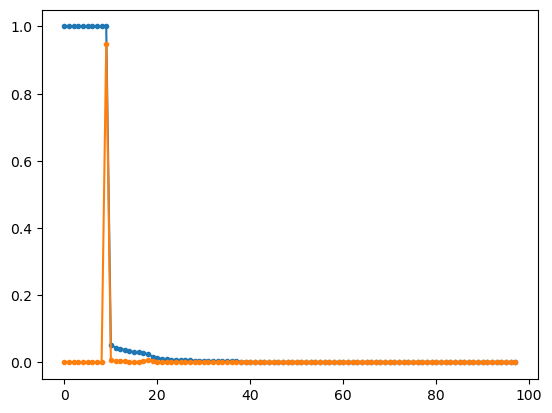

In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
Sab = Ca.T @ S @ Vb
U,s,V = np.linalg.svd(Sab)
gaps = []
for sidx,si in enumerate(s):
    if sidx < len(s)-1:
        gaps.append(si-s[sidx+1])
    else:
        gaps.append(si)
    print(" %4i %12.8f %12.8f" %(sidx, si, gaps[sidx]))

plt.plot(s, marker=".", label="s")
plt.plot(gaps, marker=".", label="gap")
# plt.ylim([0, .1])
pyscf.tools.molden.from_mo(mf.mol, "scr/Ca_corresponding.molden", Ca@U)

# nact = 
na = mf.nelec[0]
nb = mf.nelec[1]
Cloc = pyscf.lo.PM(pymol).kernel(Ca@U[:,0:na-nb])
pyscf.tools.molden.from_mo(mf.mol, "scr/Cloc.molden", Cloc)

In [5]:
alist = [0, 3, 4, 7, 9]
blist = [1, 2, 5, 6, 8]
Ca_bs = Ca@U[:,10:98]
Cb_bs = Ca@U[:,10:98]
Ca_bs = np.hstack([Ca_bs, Cloc[:,alist]])
Cb_bs = np.hstack([Cb_bs, Cloc[:,blist]])

print(np.linalg.det(Ca_bs.T @ S @ Ca_bs))
print(np.linalg.det(Cb_bs.T @ S @ Cb_bs))
print(Ca_bs.shape)
print(Cb_bs.shape)
pyscf.tools.molden.from_mo(mf.mol, "scr/Ca_bs.molden", Ca_bs)
pyscf.tools.molden.from_mo(mf.mol, "scr/Cb_bs.molden", Cb_bs)

0.9999999999999699
0.9999999999999692
(286, 93)
(286, 93)


In [6]:
pymol = pyscf.gto.Mole(
        atom    =   molecule,
        symmetry=   True,
        spin    =   0, # number of unpaired electrons
        charge  =   -2,
        basis   =   basis).build()

mf = pyscf.dft.UKS(pymol)
mf.kernel((Ca_bs @ Ca_bs.T, Cb_bs @ Cb_bs.T))

converged SCF energy = -5060.74554940308  <S^2> = 4.2666402  2S+1 = 4.2504777


-5060.74554940308

In [17]:
Ca = mf.mo_coeff[0][:,mf.mo_occ[0]==1]
Cb = mf.mo_coeff[1][:,mf.mo_occ[1]==1]
Va = mf.mo_coeff[0][:,mf.mo_occ[0]==0]
Vb = mf.mo_coeff[1][:,mf.mo_occ[1]==0]
S = mf.get_ovlp()
Pa = Ca @ Ca.T
Pb = Cb @ Cb.T
Pspin = Pa - Pb
pyscf.tools.molden.from_mo(mf.mol, "scr/Ca.molden", Ca)
pyscf.tools.molden.from_mo(mf.mol, "scr/Cb.molden", Cb)
# pyscf.tools.cubegen.density(mf.mol, "scr/Pspin.cube", Pspin, resolution=None, margin=3.0);

X = scipy.linalg.sqrtm(S)
Xinv = np.linalg.inv(X)

# Sab = Ca.T @ S @ Cb
# U,s,V = np.linalg.svd(Sab)
Pspin_orth = X@(Pa+Pb)@X 
Pspin_orth = .5*(Pspin_orth + Pspin_orth.T)
s,U = np.linalg.eigh(Pspin_orth)


perm = abs(s-1).argsort()
s = s[perm]
U = U[:,perm]
pyscf.tools.molden.from_mo(mf.mol, "scr/natorbs.molden", U)

# gaps = []
for sidx,si in enumerate(s[0:100]):
    print(" %4i %12.8f %12.8f" %(sidx,si, 1-abs(si-1)))

# plt.plot(abs(s), marker=".", label="s")

nact = 10
inds_act  = []
inds_doc  = []
inds_vir  = []

for sidx,si in enumerate(s):
    if sidx < nact:
        inds_act.append(sidx)
    else:
        if si > .5:
            inds_doc.append(sidx)
        else:
            inds_vir.append(sidx)  

Cdoc = Xinv@U[:,inds_doc]
Cact = Xinv@U[:,inds_act]
Cvir = Xinv@U[:,inds_vir]

Cact = pyscf.lo.PM(pymol).kernel(Cact)
Cdoc = pyscf.lo.PM(pymol).kernel(Cdoc)
pyscf.tools.molden.from_mo(mf.mol, "scr/Cact.molden", Cact)
pyscf.tools.molden.from_mo(mf.mol, "scr/Cdoc.molden", Cdoc)

    0   0.88948296   0.88948296
    1   1.11051704   0.88948296
    2   0.80023324   0.80023324
    3   1.19976676   0.80023324
    4   0.65761970   0.65761970
    5   1.34238030   0.65761970
    6   0.52909046   0.52909046
    7   1.47090954   0.52909046
    8   0.40391096   0.40391096
    9   1.59608904   0.40391096
   10   0.00107268   0.00107268
   11   1.99892732   0.00107268
   12   0.00083551   0.00083551
   13   1.99916449   0.00083551
   14   1.99918431   0.00081569
   15   0.00081569   0.00081569
   16   0.00075551   0.00075551
   17   1.99924449   0.00075551
   18   0.00059336   0.00059336
   19   1.99940664   0.00059336
   20   0.00054796   0.00054796
   21   1.99945204   0.00054796
   22   1.99948073   0.00051927
   23   0.00051927   0.00051927
   24   1.99961048   0.00038952
   25   0.00038952   0.00038952
   26   0.00036847   0.00036847
   27   1.99963153   0.00036847
   28   1.99973078   0.00026922
   29   0.00026922   0.00026922
   30   0.00011541   0.00011541
   31   

In [18]:
# Add hand-picked doubly occupied orbitals
inds = [1,2,3,4,5,6,7,8,9,11] 
inds = [i-1 for i in inds]
inds2 = []
for i in range(Cdoc.shape[1]):
    if i not in inds:
        inds2.append(i)
Cact = np.hstack((Cact,Cdoc[:,inds]))
Cdoc = Cdoc[:,inds2]

pyscf.tools.molden.from_mo(mf.mol, "scr/Cact.molden", Cact)
pyscf.tools.molden.from_mo(mf.mol, "scr/Cdoc.molden", Cdoc)

In [19]:
Cact = pyscf.lo.PM(pymol).kernel(Cact)
Cdoc = pyscf.lo.PM(pymol).kernel(Cdoc)
pyscf.tools.molden.from_mo(mf.mol, "scr/Cact.molden", Cact)
pyscf.tools.molden.from_mo(mf.mol, "scr/Cdoc.molden", Cdoc)

In [20]:
reorder = [2,4,6,8,9,15,16,11,13,17,12,14,20,1,3,5,7,10,18,19]
reorder = [i-1 for i in reorder]
Cact = Cact[:,reorder]
pyscf.tools.molden.from_mo(mf.mol, "scr/Cact.molden", Cact)

In [21]:
clusters = [[0,1,2,3,4,5,6],[7,8,9],[10,11,12],[13,14,15,16,17,18,19]]
init_fspace = [(7,2),(3,3),(3,3),(2,7)]
print(" init_fspace = ", init_fspace)
print(" clusters    = ", clusters)


 init_fspace =  [(7, 2), (3, 3), (3, 3), (2, 7)]
 clusters    =  [[0, 1, 2, 3, 4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15, 16, 17, 18, 19]]


# Make Integrals

In [22]:
Cenv = Cdoc
print(Cenv.shape)
print(Cact.shape)
d1_embed = 2 * Cenv @ Cenv.T

h0 = pyscf.gto.mole.energy_nuc(mf.mol)
h  = pyscf.scf.hf.get_hcore(mf.mol)
j, k = pyscf.scf.hf.get_jk(mf.mol, d1_embed, hermi=1)

print(h.shape)
h0 += np.trace(d1_embed @ ( h + .5*j - .25*k))

h = Cact.T @ h @ Cact;
j = Cact.T @ j @ Cact;
k = Cact.T @ k @ Cact;
nact = h.shape[0]

h2 = pyscf.ao2mo.kernel(pymol, Cact, aosym="s4", compact=False)
h2.shape = (nact, nact, nact, nact)
# The use of d1_embed only really makes sense if it has zero electrons in the
# active space. Let's warn the user if that's not true

S = pymol.intor("int1e_ovlp_sph")
n_act = np.trace(S @ d1_embed @ S @ Cact @ Cact.T)
if abs(n_act) > 1e-8 == False:
    print(n_act)
    error(" I found embedded electrons in the active space?!")

h1 = h + j - .5*k;

np.save("ints_h0", h0)
np.save("ints_h1", h1)
np.save("ints_h2", h2)
np.save("mo_coeffs", Cact)
np.save("overlap_mat", S)

Pa = mf.make_rdm1()[0]
Pb = mf.make_rdm1()[1]
np.save("Pa", Cact.T @ S @ Pa @ S @ Cact)
np.save("Pb", Cact.T @ S @ Pb @ S @ Cact)

(286, 78)
(286, 20)
(286, 286)


In [ ]:
import numpy as np
Ccmf = np.load("Ccmf.npy")
pyscf.tools.molden.from_mo(mf.mol, "Ccmf.molden", Ccmf)
